# Task 2 - To Explore Unsupervised Machine Learning

# Done by Aayush kumar

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Importing Datasets

In [2]:
iris=pd.read_csv('C:\\Users\\win\\Desktop\\Grip Dataset\\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#checking unique values in the column 'species' 
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
#making id column as index
iris.set_index(['Id'],inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# checking the Nullvalues 

iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#Droping the species column

iris.drop(['Species'],axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


# Checking the correlation between the columns by using Heatmap

Text(0.5, 1.0, "Heatmap of 'Iris_dataset'")

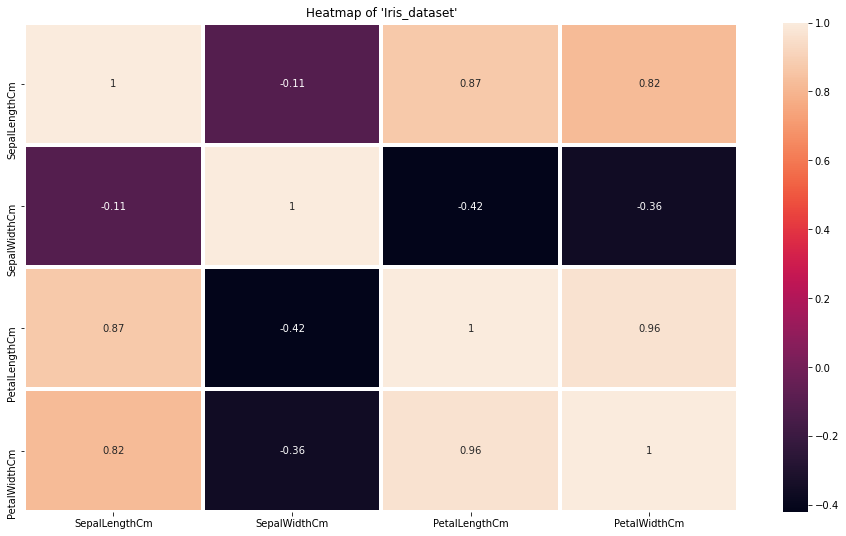

In [7]:
plt.figure(figsize=(16,9))
ax=sns.heatmap(iris.corr(),annot=True,linewidth=3)
plt.title("Heatmap of 'Iris_dataset'")

# Drawing pairplot for better visualization of data distribution

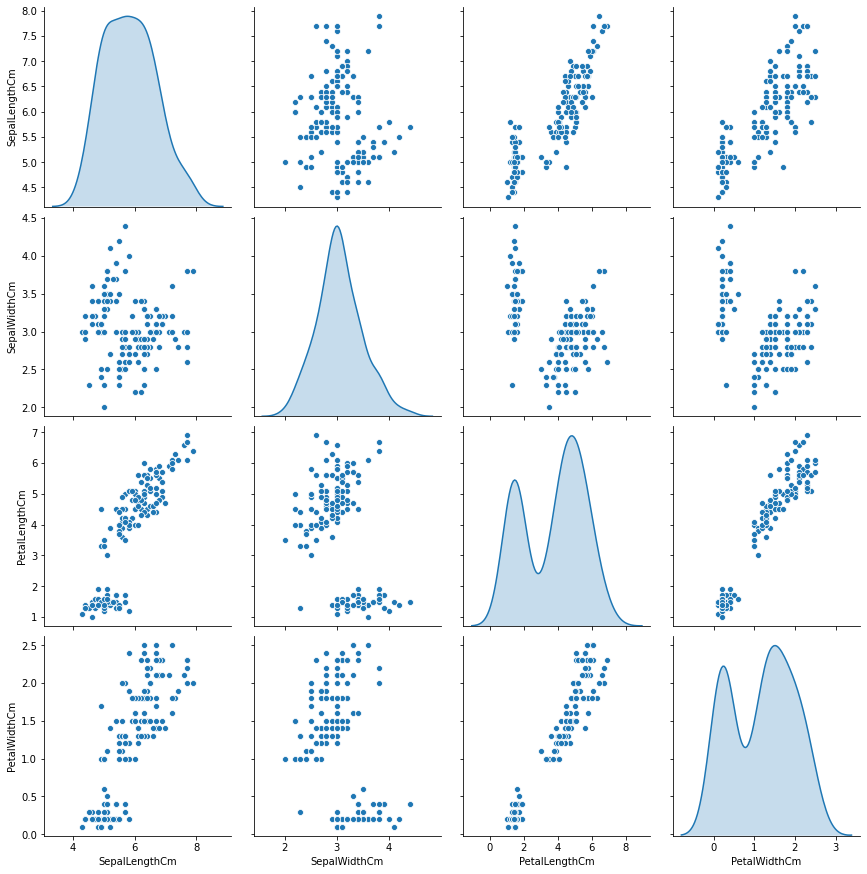

In [8]:
sns.pairplot(iris,diag_kind='kde',height=3)

# Training Datasets

In [9]:
# preparing the Data
x =iris.iloc[:,[0,1,2,3]].values



sse=[]  #sum of square error

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

# finding value of 'k' by using elbow method

Text(0, 0.5, 'Sum of Square Error(SSE)')

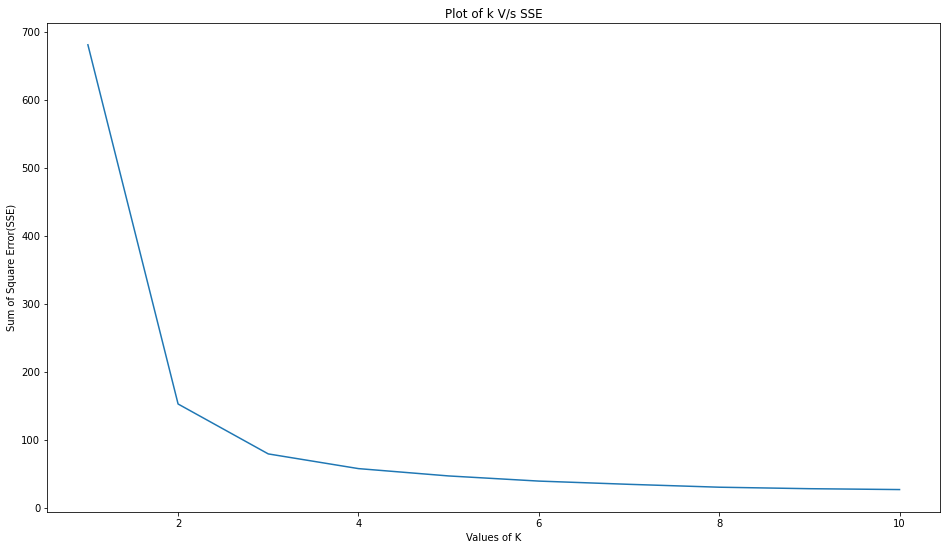

In [10]:
plt.figure(figsize=(16,9))


plt.plot(range(1,11),sse)
plt.title('Plot of k V/s SSE')
plt.xlabel('Values of K')
plt.ylabel('Sum of Square Error(SSE)')

# It is clear from above elbow-plot that value of 'k' is 3.

In [11]:
#Applying Kmeans to the Datasets

kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=21)
# Making Prediction
y_kmeans=kmeans.fit_predict(x)

In [12]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

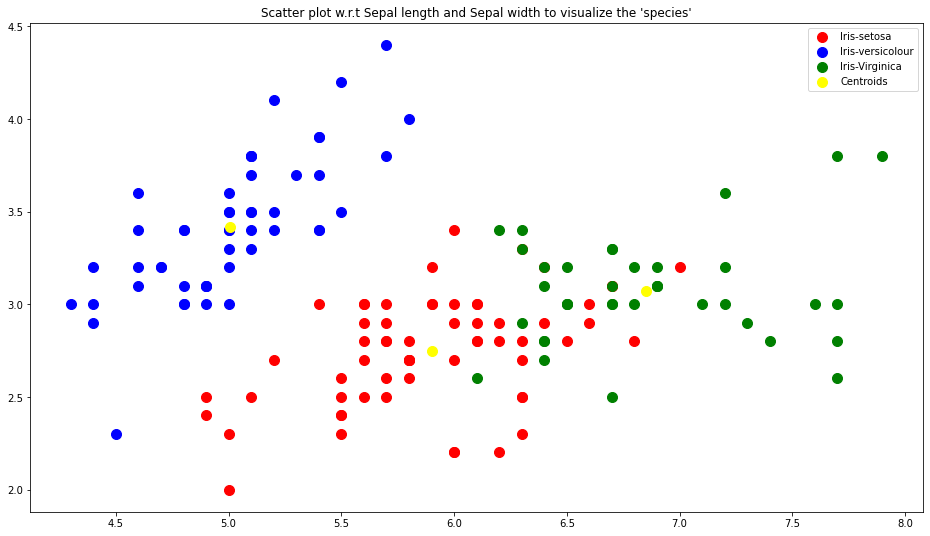

In [13]:
# Scatter plot for first two columns of the data
plt.figure(figsize=(16,9))

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')#plotting centroid
plt.title("Scatter plot w.r.t Sepal length and Sepal width to visualize the 'species'")
plt.legend()

# Scatter plot for last two columns

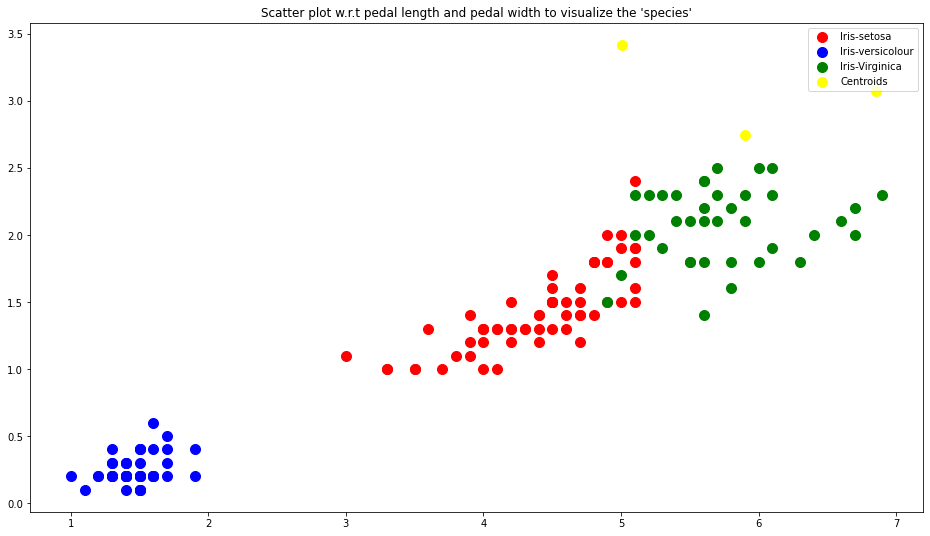

In [14]:
plt.figure(figsize=(16,9))
plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,3],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,3],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,3],s=100,c='green',label='Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')#plotting centroid
plt.title("Scatter plot w.r.t pedal length and pedal width to visualize the 'species'")
plt.legend()

# Thank You